___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [115]:
import os
import random
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option("display.max_columns", None)

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna
import pickle

In [117]:
os.environ["TF_DETERMINISTIC_OPS"] = "1"
tf.keras.utils.set_random_seed(101)
os.environ['PYTHONHASHSEED']=str(42)
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [118]:
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [119]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [122]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [123]:
df.shape

(10000, 14)

In [124]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

c:\Users\white\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\white\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\white\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Exited', ylabel='count'>

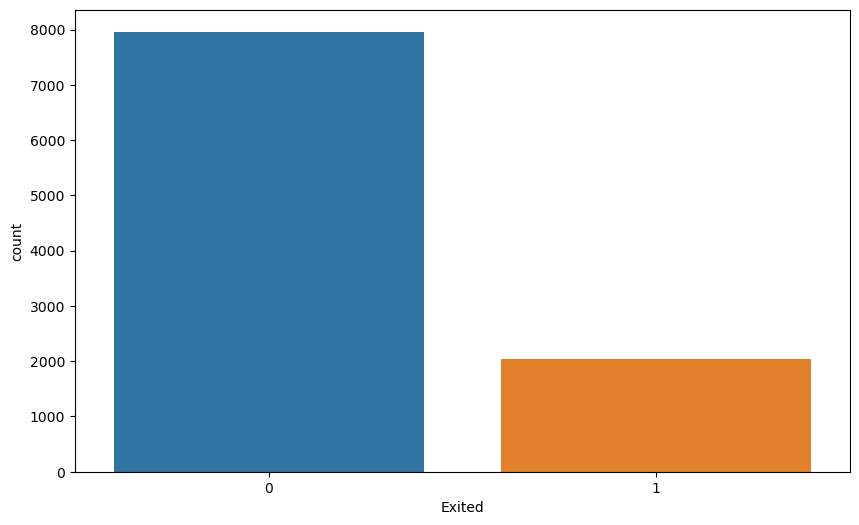

In [125]:
sns.countplot(x=df.Exited)

In [126]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [127]:
df.duplicated().sum()

0

In [128]:
#droping not suitable features
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

c:\Users\white\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\white\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\white\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\white\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

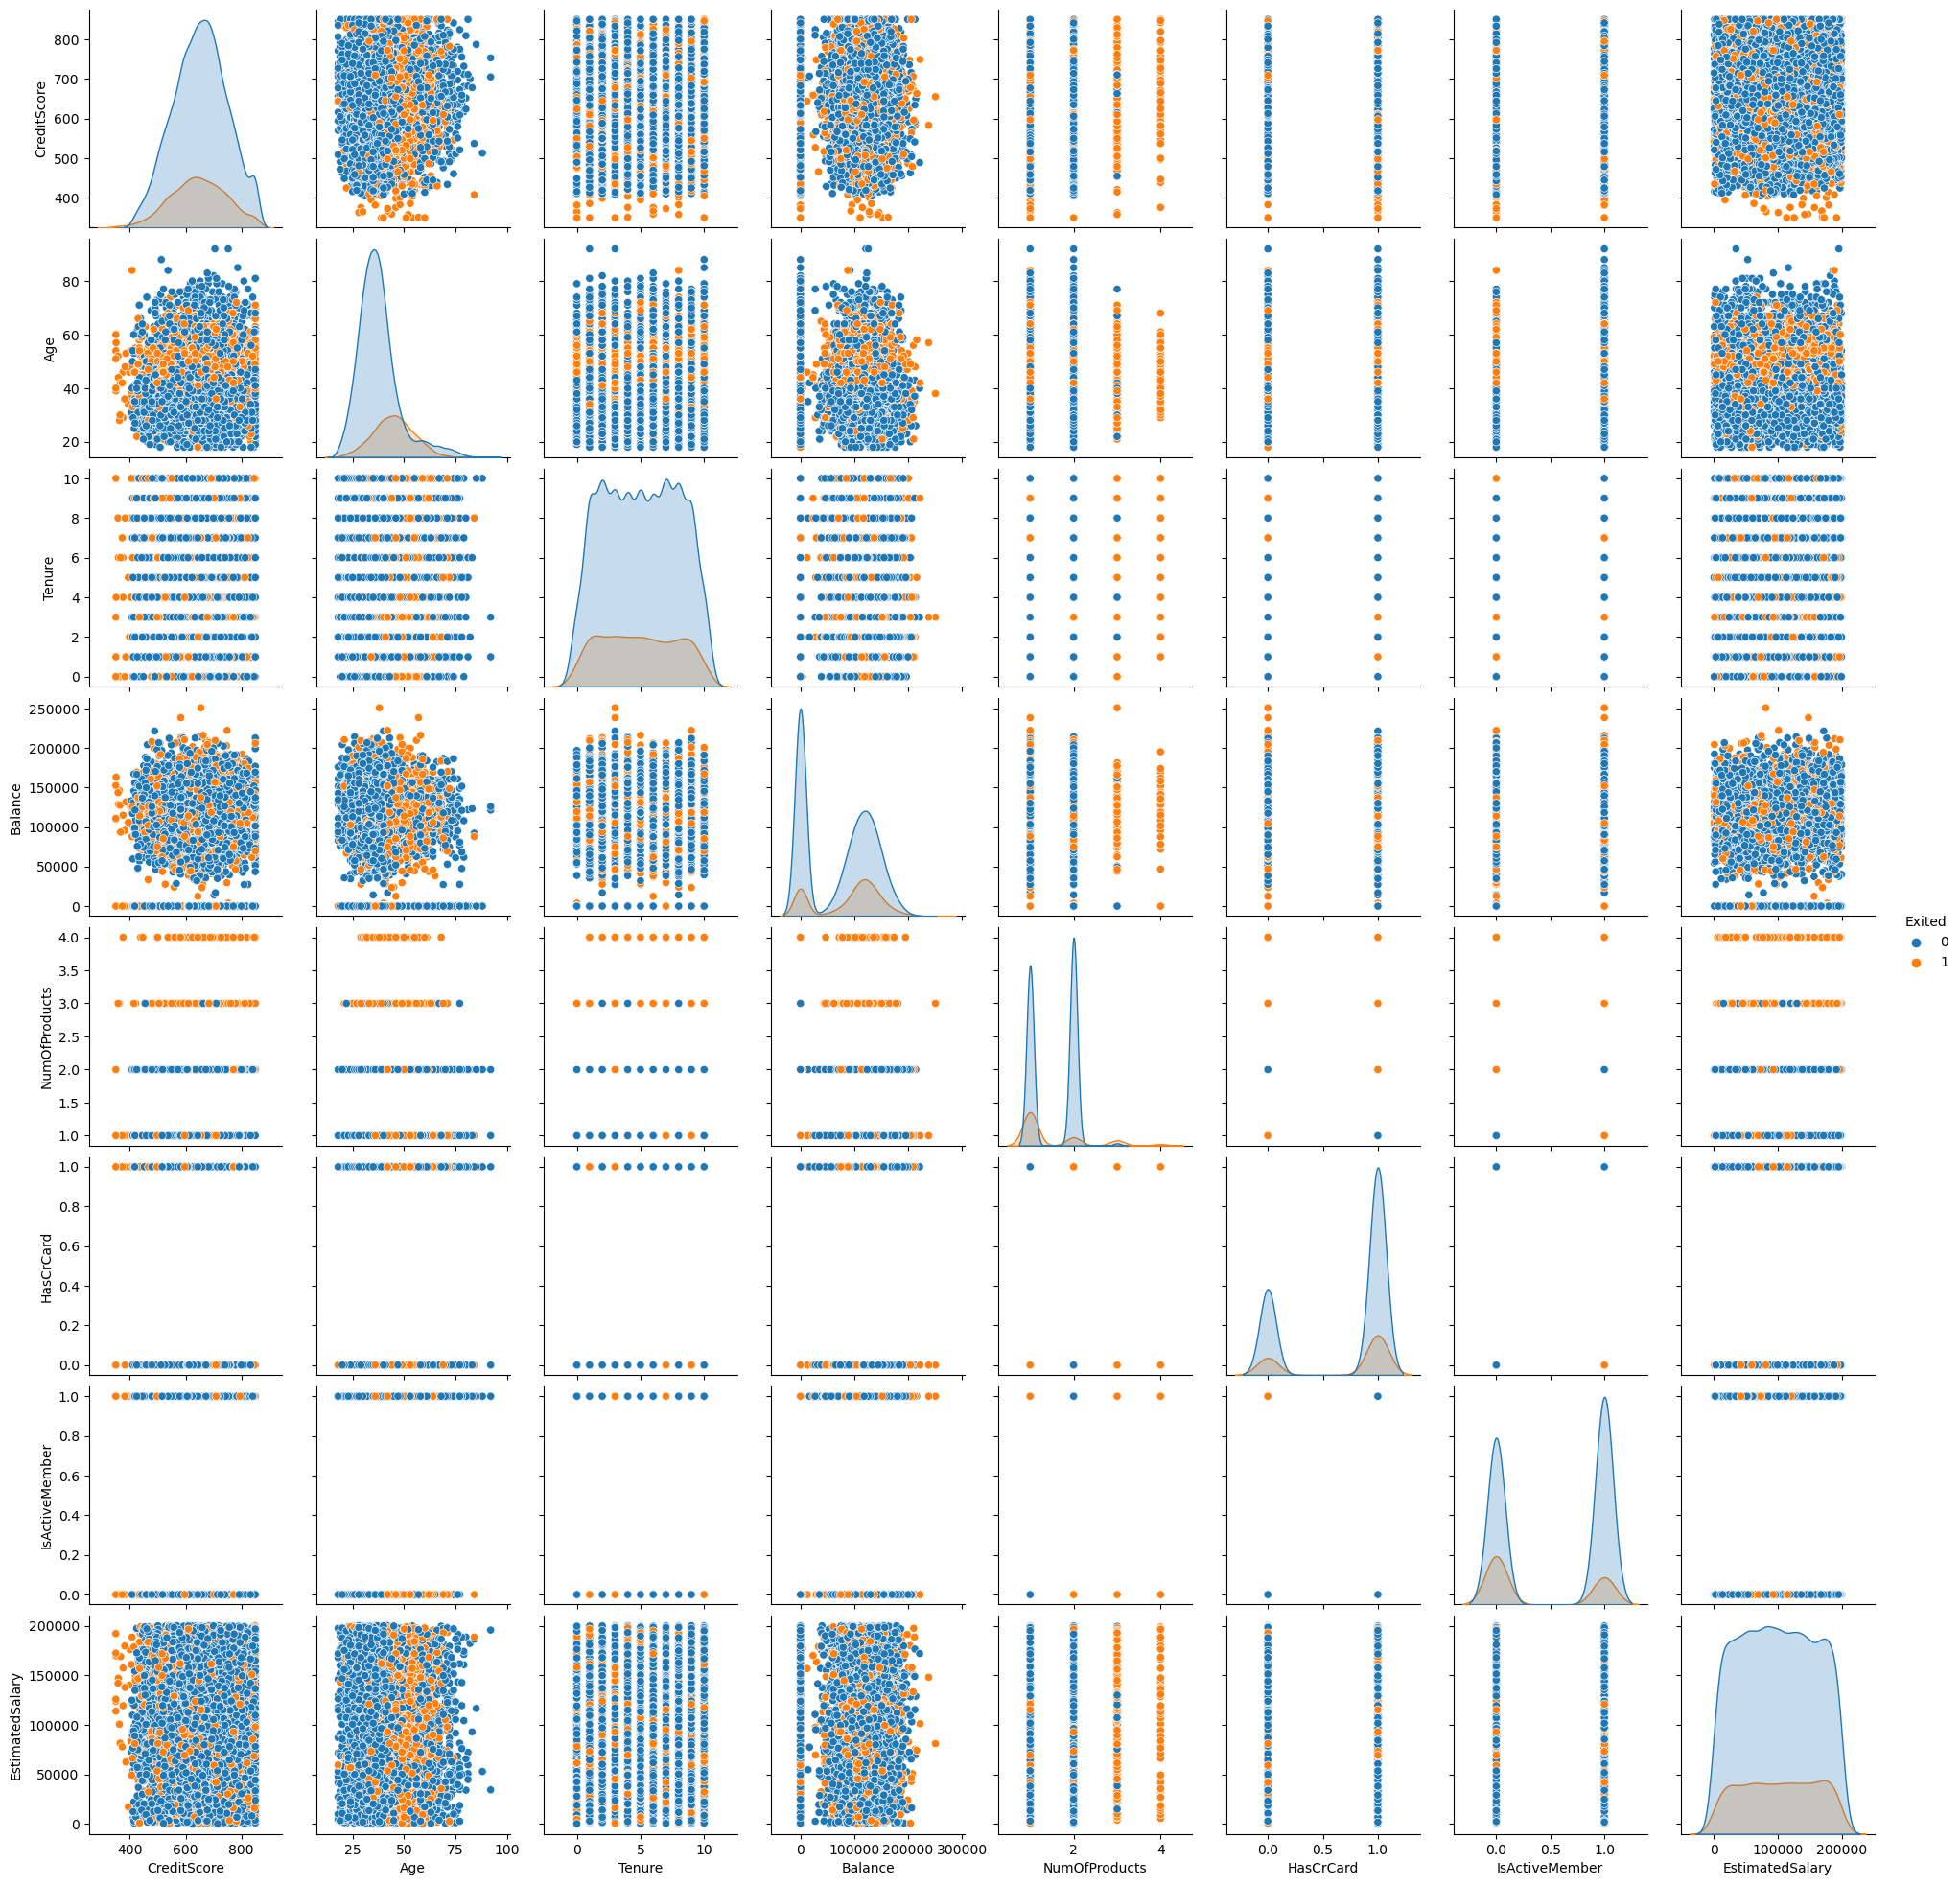

In [129]:
sns.pairplot(df, hue="Exited")

<Axes: >

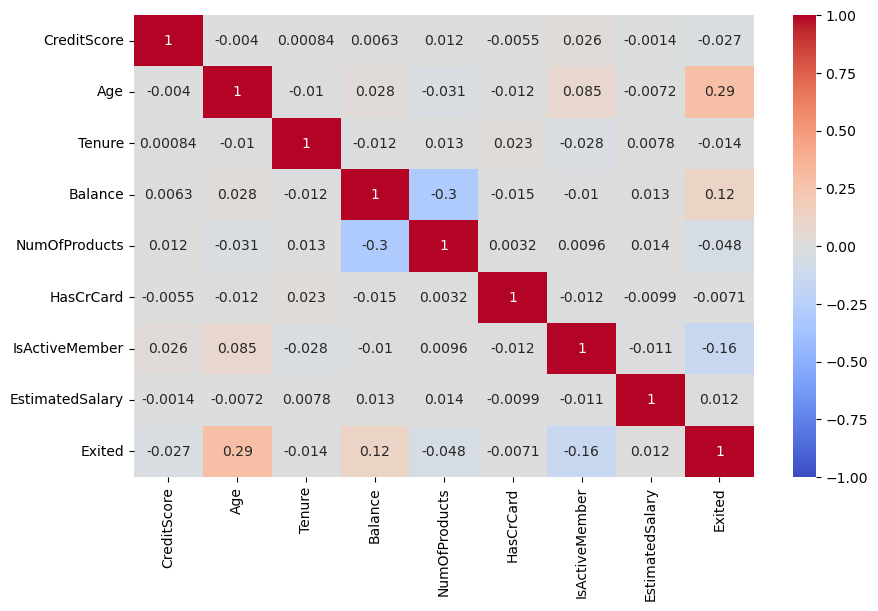

In [130]:
sns.heatmap(df.corr(numeric_only=True), vmax=1, vmin=-1, cmap="coolwarm", annot=True)

<Axes: >

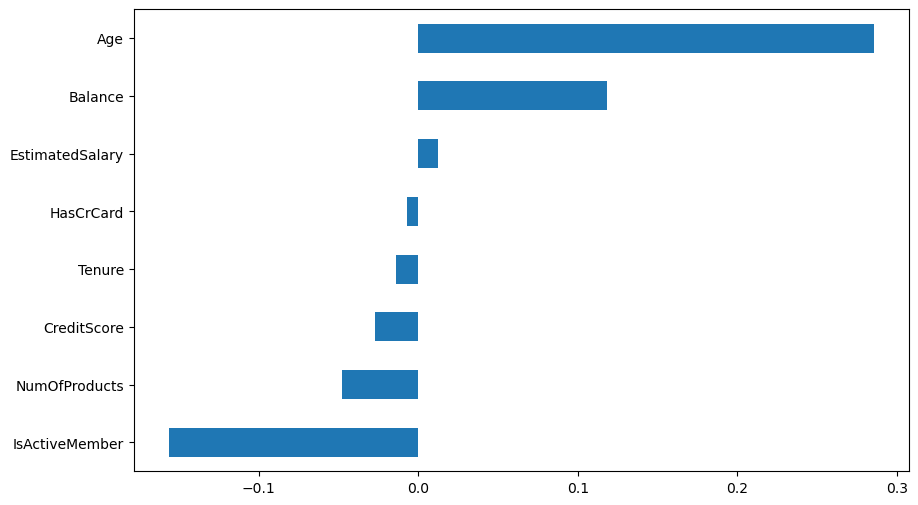

In [131]:
df.corr(numeric_only=True)["Exited"].sort_values().drop("Exited").plot(kind="barh")

In [132]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

In [134]:
encoded_features = df[["Geography", "Gender", "HasCrCard", "IsActiveMember"]]

In [135]:
encoded_features

,Geography,Gender,HasCrCard,IsActiveMember
0,France,Female,1,1
1,Spain,Female,0,1
2,France,Female,1,0
3,France,Female,0,0
4,Spain,Female,1,1
...,...,...,...,...
9995,France,Male,1,0
9996,France,Male,1,1
9997,France,Female,0,1
9998,Germany,Male,1,0


In [136]:
encoded_features = encoder.fit_transform(encoded_features)

In [137]:
encoded_features = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

In [140]:
df.drop(columns=encoder.feature_names_in_, inplace=True)

In [141]:
df = pd.concat([df, encoded_features], axis=1)

In [142]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,608,41,1,83807.86,1,112542.58,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,502,42,8,159660.80,3,113931.57,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,699,39,1,0.00,2,93826.63,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,79084.10,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


# Preprocessing of Data
- Train | Test Split, Scalling

In [144]:
X = df.drop(columns=["Exited"])
y = df.Exited

In [146]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.10, random_state=42
)

In [147]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.10, random_state=42
)

In [148]:
scaler = MinMaxScaler()

In [149]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val= scaler.transform(X_val)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [150]:
X_train.shape

(8100, 15)

In [151]:
X_val.shape

(900, 15)

In [152]:
X_test.shape

(1000, 15)

In [153]:
model = Sequential([
    Dense(36, activation="relu", input_dim=X_train.shape[1]),
    Dense(18, activation="relu"),
    Dense(18, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [154]:
model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), batch_size=64, epochs=300, verbose=1)

Epoch 1/300
113/127 [=========================>....] - ETA: 0s - loss: 0.5274 - accuracy: 0.7681

127/127 [==============================] - 1s 5ms/step - loss: 0.5185 - accuracy: 0.7737 - val_loss: 0.4841 - val_accuracy: 0.7967
Epoch 2/300
127/127 [==============================] - 0s 3ms/step - loss: 0.4697 - accuracy: 0.7956 - val_loss: 0.4732 - val_accuracy: 0.7967
Epoch 3/300
127/127 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.8004 - val_loss: 0.4599 - val_accuracy: 0.8033
Epoch 4/300
127/127 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.8080 - val_loss: 0.4498 - val_accuracy: 0.8033
Epoch 5/300
127/127 [==============================] - 0s 2ms/step - loss: 0.4284 - accuracy: 0.8183 - val_loss: 0.4409 - val_accuracy: 0.8133
Epoch 6/300
127/127 [==============================] - 0s 3ms/step - loss: 0.4206 - accuracy: 0.8199 - val_loss: 0.4392 - val_accuracy: 0.8100
Epoch 7/300
127/127 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8221 - val_loss: 0.4357 - val_accuracy: 0.8144
Epoch 8/300

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

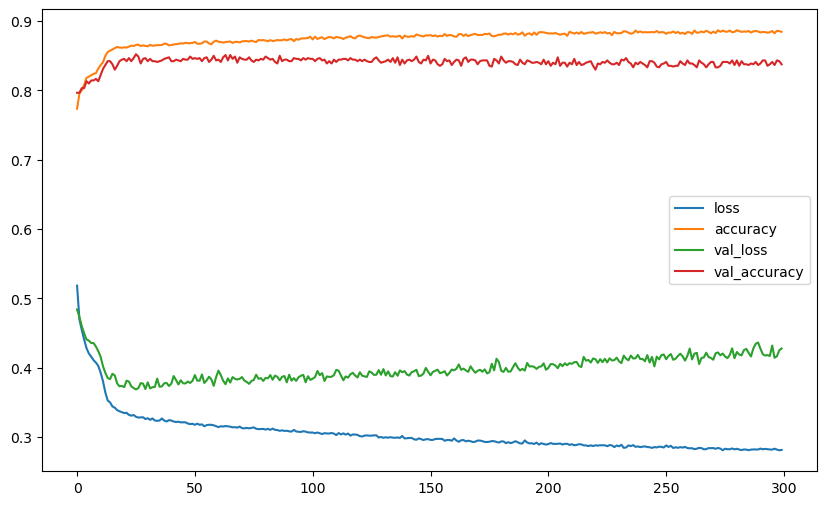

In [155]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [156]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 742us/step
[[757  39]
 [107  97]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.71      0.48      0.57       204

    accuracy                           0.85      1000
   macro avg       0.79      0.71      0.74      1000
weighted avg       0.84      0.85      0.84      1000



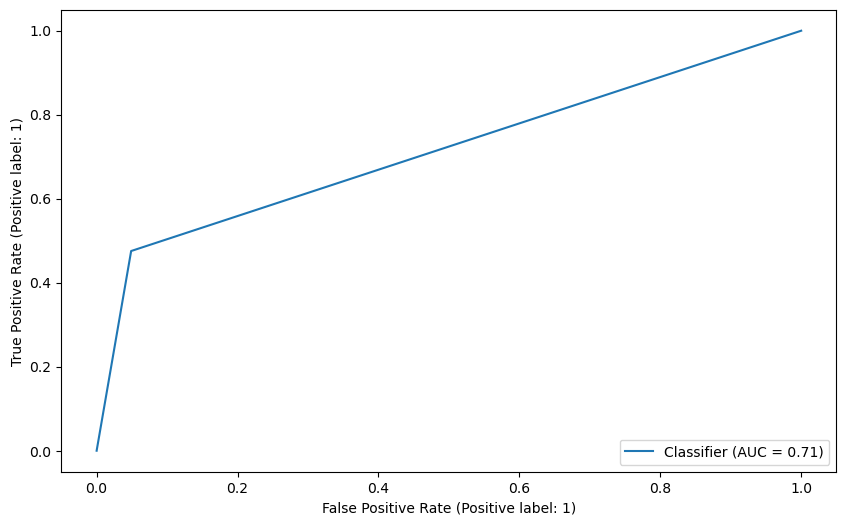

In [157]:
RocCurveDisplay.from_predictions(y_test, y_pred)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [158]:
class_weights = dict(zip(np.unique(y_train), compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)))

In [159]:
class_weights

{0: 0.627906976744186, 1: 2.4545454545454546}

In [160]:
model = Sequential([
    Dense(36, activation="relu", input_dim=X_train.shape[1]),
    Dense(18, activation="relu"),
    Dense(18, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [161]:
model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), class_weight=class_weights, batch_size=64, epochs=300, verbose=1)

Epoch 1/300


127/127 [==============================] - 1s 3ms/step - loss: 0.6711 - accuracy: 0.5226 - val_loss: 0.6316 - val_accuracy: 0.6656
Epoch 2/300
127/127 [==============================] - 0s 2ms/step - loss: 0.6166 - accuracy: 0.6746 - val_loss: 0.6140 - val_accuracy: 0.6733
Epoch 3/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5836 - accuracy: 0.7073 - val_loss: 0.5583 - val_accuracy: 0.7200
Epoch 4/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5560 - accuracy: 0.7226 - val_loss: 0.5411 - val_accuracy: 0.7489
Epoch 5/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.7421 - val_loss: 0.4966 - val_accuracy: 0.7800
Epoch 6/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.7562 - val_loss: 0.5413 - val_accuracy: 0.7444
Epoch 7/300
127/127 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.7616 - val_loss: 0.4781 - val_accuracy: 0.7633
Epoch 8/300

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

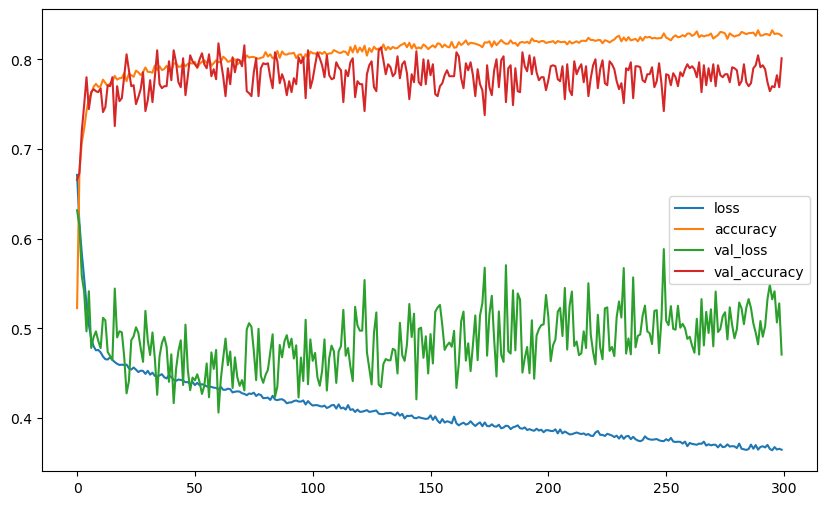

In [162]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [163]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 871us/step
[[679 117]
 [ 65 139]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       796
           1       0.54      0.68      0.60       204

    accuracy                           0.82      1000
   macro avg       0.73      0.77      0.74      1000
weighted avg       0.84      0.82      0.83      1000



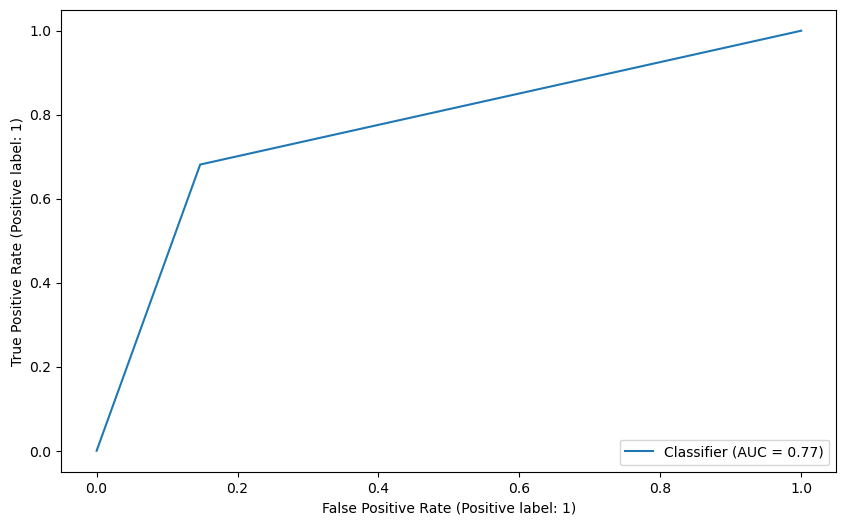

In [164]:
RocCurveDisplay.from_predictions(y_test, y_pred)

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [165]:
model = Sequential([
    Dense(36, activation="relu", input_dim=X_train.shape[1]),
    Dense(18, activation="relu"),
    Dense(18, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer=Adam(learning_rate=0.005), loss="binary_crossentropy", metrics=["accuracy"])

In [166]:
model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), class_weight=class_weights, batch_size=64, epochs=300, verbose=1)

Epoch 1/300
127/127 [==============================] - 1s 3ms/step - loss: 0.6312 - accuracy: 0.6406 - val_loss: 0.5337 - val_accuracy: 0.7511
Epoch 2/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.6926 - val_loss: 0.4967 - val_accuracy: 0.7800
Epoch 3/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5607 - accuracy: 0.7219 - val_loss: 0.5952 - val_accuracy: 0.7011
Epoch 4/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5496 - accuracy: 0.7210 - val_loss: 0.5628 - val_accuracy: 0.7467
Epoch 5/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5201 - accuracy: 0.7467 - val_loss: 0.4953 - val_accuracy: 0.7689
Epoch 6/300
127/127 [==============================] - 0s 2ms/step - loss: 0.4976 - accuracy: 0.7516 - val_loss: 0.6002 - val_accuracy: 0.7000
Epoch 7/300
127/127 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.7575 - val_loss: 0.4631 - val_accuracy: 0.7833

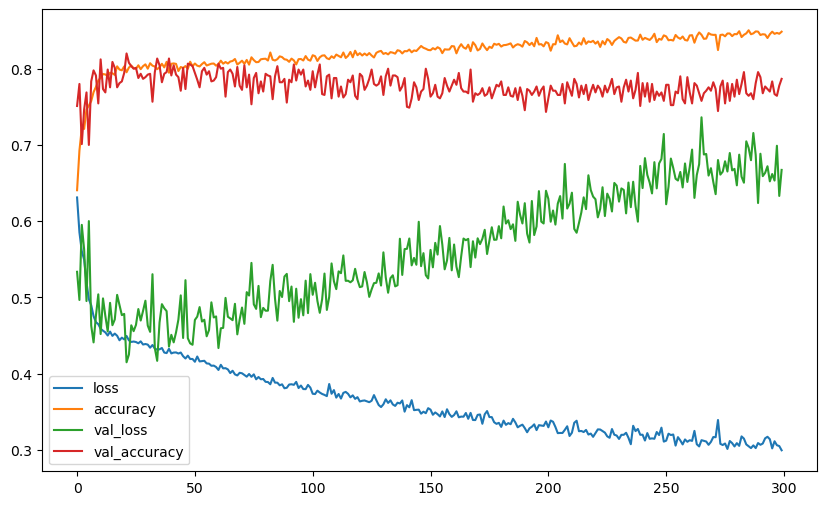

In [167]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [168]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 742us/step
[[652 144]
 [ 64 140]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       796
           1       0.49      0.69      0.57       204

    accuracy                           0.79      1000
   macro avg       0.70      0.75      0.72      1000
weighted avg       0.83      0.79      0.80      1000



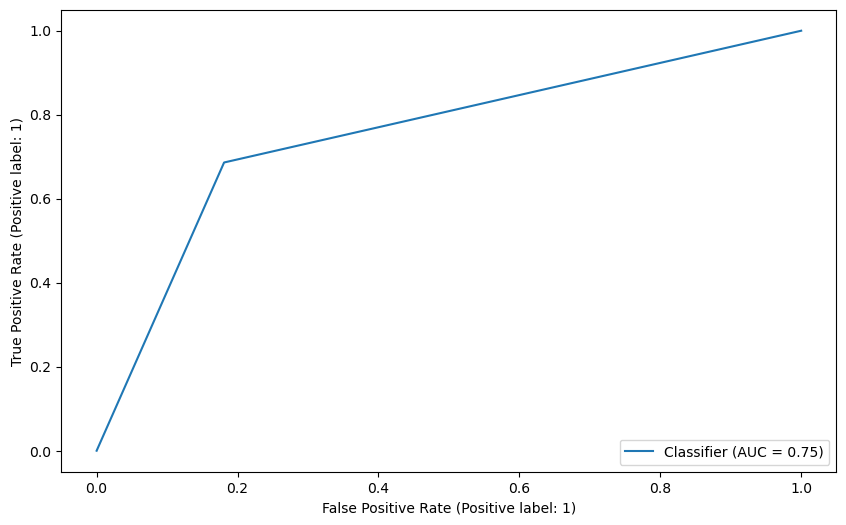

In [169]:
RocCurveDisplay.from_predictions(y_test, y_pred)

### Add Dropout Layer

In [170]:
model = Sequential([
    Dense(36, activation="relu", input_dim=X_train.shape[1]),
    Dropout(rate=0.5),
    Dense(18, activation="relu"),
    Dropout(rate=0.5),
    Dense(18, activation="relu"),
    Dropout(rate=0.5),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [171]:
model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), class_weight=class_weights, batch_size=64, epochs=300, verbose=1)

Epoch 1/300
127/127 [==============================] - 1s 3ms/step - loss: 0.7328 - accuracy: 0.5202 - val_loss: 0.6795 - val_accuracy: 0.7189
Epoch 2/300
127/127 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5142 - val_loss: 0.6872 - val_accuracy: 0.6500
Epoch 3/300
127/127 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5793 - val_loss: 0.6783 - val_accuracy: 0.7233
Epoch 4/300
127/127 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.6138 - val_loss: 0.6799 - val_accuracy: 0.6667
Epoch 5/300
127/127 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.6284 - val_loss: 0.6586 - val_accuracy: 0.7100
Epoch 6/300
127/127 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.6554 - val_loss: 0.6611 - val_accuracy: 0.6956
Epoch 7/300
127/127 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6568 - val_loss: 0.6562 - val_accuracy: 0.7033

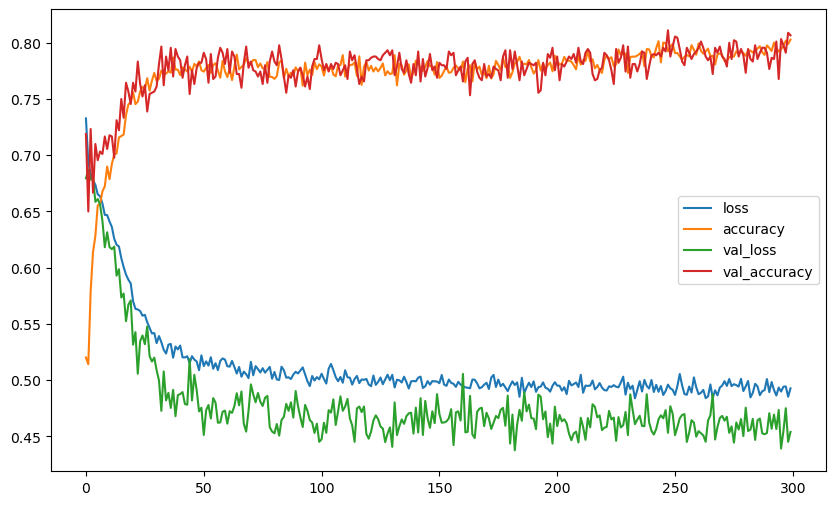

In [172]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [173]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 710us/step
[[645 151]
 [ 61 143]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       796
           1       0.49      0.70      0.57       204

    accuracy                           0.79      1000
   macro avg       0.70      0.76      0.72      1000
weighted avg       0.83      0.79      0.80      1000



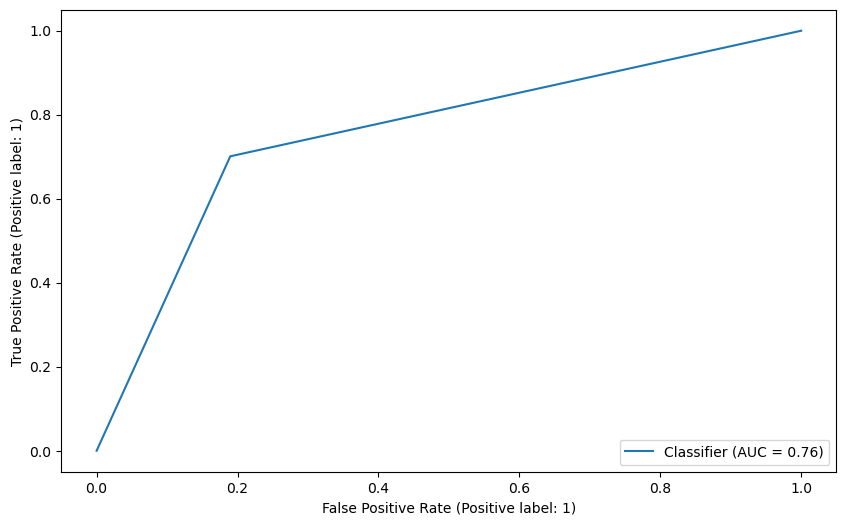

In [174]:
RocCurveDisplay.from_predictions(y_test, y_pred)

### Add Early Stop

#### Monitor the "val_loss" as metric

In [175]:
model = Sequential([
    Dense(36, activation="relu", input_dim=X_train.shape[1]),
    Dense(18, activation="relu"),
    Dense(18, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [176]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=20, restore_best_weights=True
)

In [177]:
model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), class_weight=class_weights, batch_size=64, epochs=300, verbose=1, callbacks=[early_stop])

Epoch 1/300
127/127 [==============================] - 1s 3ms/step - loss: 0.6645 - accuracy: 0.5774 - val_loss: 0.6074 - val_accuracy: 0.6822
Epoch 2/300
127/127 [==============================] - 0s 2ms/step - loss: 0.6169 - accuracy: 0.6717 - val_loss: 0.5935 - val_accuracy: 0.6944
Epoch 3/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5828 - accuracy: 0.7058 - val_loss: 0.5514 - val_accuracy: 0.7133
Epoch 4/300
127/127 [==============================] - 0s 3ms/step - loss: 0.5629 - accuracy: 0.7170 - val_loss: 0.5590 - val_accuracy: 0.7389
Epoch 5/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5439 - accuracy: 0.7346 - val_loss: 0.5177 - val_accuracy: 0.7644
Epoch 6/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5287 - accuracy: 0.7481 - val_loss: 0.5283 - val_accuracy: 0.7622
Epoch 7/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5130 - accuracy: 0.7546 - val_loss: 0.4913 - val_accuracy: 0.7833

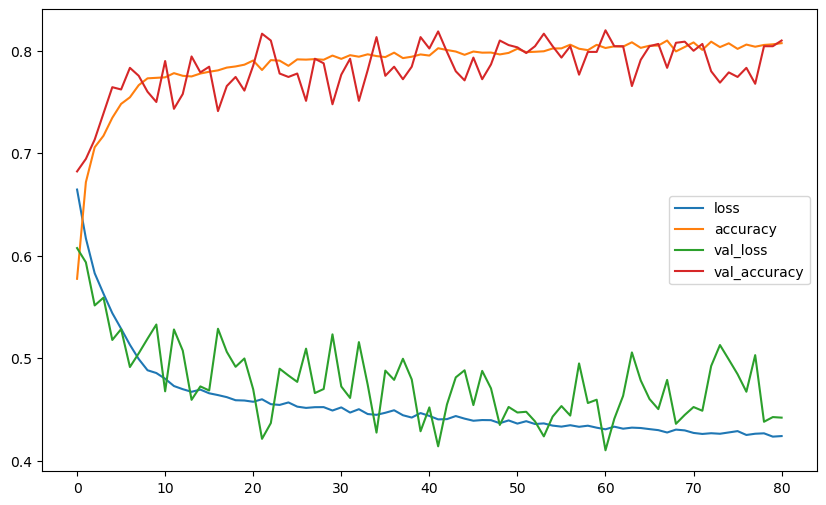

In [178]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [179]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 742us/step
[[688 108]
 [ 73 131]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       796
           1       0.55      0.64      0.59       204

    accuracy                           0.82      1000
   macro avg       0.73      0.75      0.74      1000
weighted avg       0.83      0.82      0.82      1000



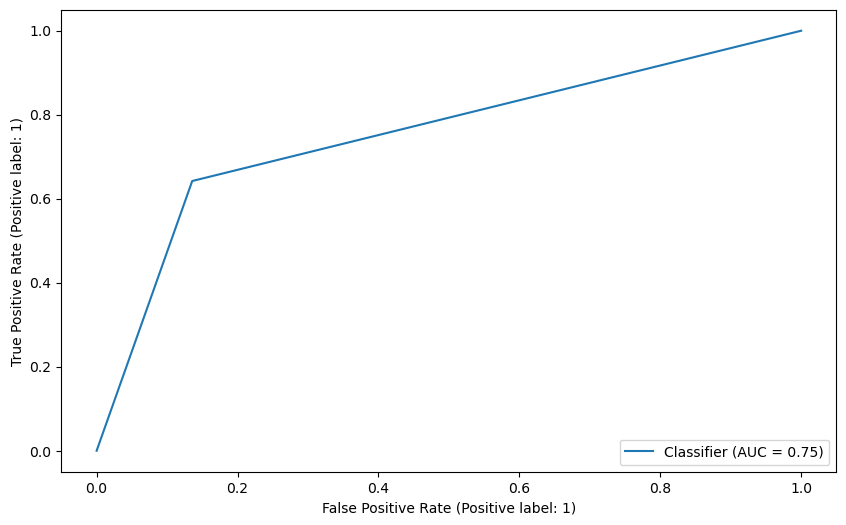

In [180]:
RocCurveDisplay.from_predictions(y_test, y_pred)

#### Monitor the "val_recall" as metric

In [181]:
model = Sequential([
    Dense(36, activation="relu", input_dim=X_train.shape[1]),
    Dense(18, activation="relu"),
    Dense(18, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [182]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=20, restore_best_weights=True
)

In [183]:
model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), class_weight=class_weights, batch_size=64, epochs=300, verbose=1, callbacks=[early_stop])

Epoch 1/300
127/127 [==============================] - 1s 3ms/step - loss: 0.6534 - recall: 0.6115 - val_loss: 0.6016 - val_recall: 0.5082
Epoch 2/300
127/127 [==============================] - 0s 3ms/step - loss: 0.6173 - recall: 0.6642 - val_loss: 0.6079 - val_recall: 0.6120
Epoch 3/300
127/127 [==============================] - 0s 3ms/step - loss: 0.5903 - recall: 0.6873 - val_loss: 0.5734 - val_recall: 0.6284
Epoch 4/300
127/127 [==============================] - 0s 3ms/step - loss: 0.5727 - recall: 0.7048 - val_loss: 0.5792 - val_recall: 0.6667
Epoch 5/300
127/127 [==============================] - 0s 3ms/step - loss: 0.5570 - recall: 0.7024 - val_loss: 0.5455 - val_recall: 0.6011
Epoch 6/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5439 - recall: 0.7115 - val_loss: 0.5530 - val_recall: 0.6448
Epoch 7/300
127/127 [==============================] - 0s 3ms/step - loss: 0.5306 - recall: 0.7267 - val_loss: 0.5256 - val_recall: 0.6230
Epoch 8/300
127/127 [======

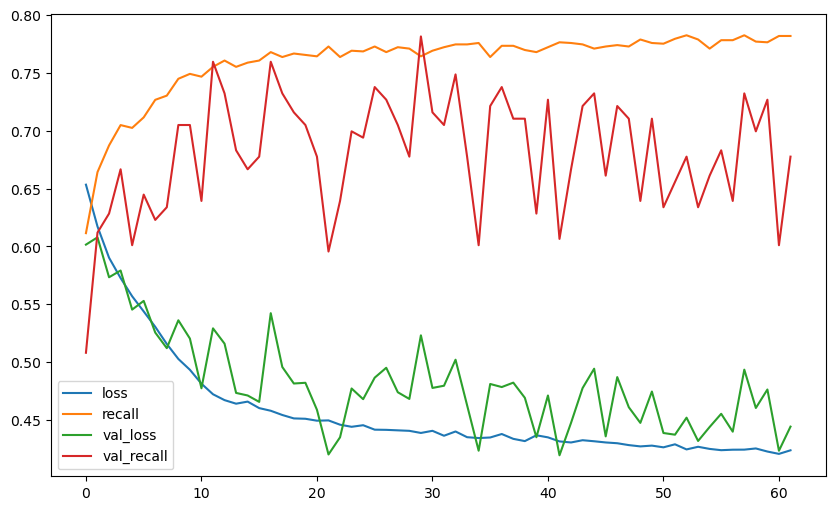

In [184]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [185]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[682 114]
 [ 64 140]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       796
           1       0.55      0.69      0.61       204

    accuracy                           0.82      1000
   macro avg       0.73      0.77      0.75      1000
weighted avg       0.84      0.82      0.83      1000



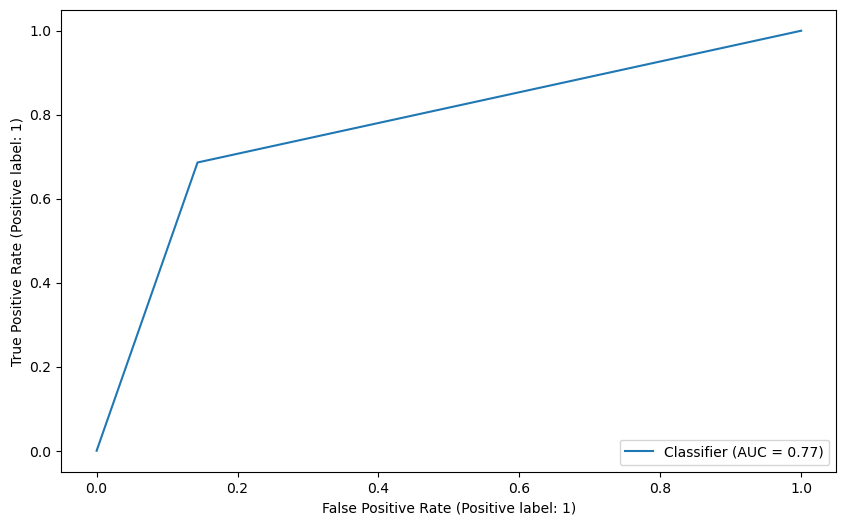

In [186]:
RocCurveDisplay.from_predictions(y_test, y_pred)

## Optuna

In [196]:
def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    n_units3 = trial.suggest_int("n_units3", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)
    d_rate = trial.suggest_categorical("drop_rate", [0, 0.1, 0.2, 0.3, 0.4, 0.5])

    model = Sequential([
    Dense(n_units1, activation="relu", input_dim=X_train.shape[1]),
    Dropout(rate=d_rate),
    Dense(n_units2, activation="relu"),
    Dropout(rate=d_rate),
    Dense(n_units3, activation="relu"),
    Dropout(rate=d_rate),
    Dense(1, activation="sigmoid"),
            ])
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=["accuracy"],
    )
    return model


def objective(trial):
    model = create_model(trial)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=64,
        epochs=300,
        callbacks=[early_stop],
        class_weight=class_weights,
        verbose=0,
    )
    score = model.evaluate(X_val, y_val, verbose=0)[0]
    return score

In [197]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=15)
study.best_params

[I 2023-10-30 21:59:05,641] A new study created in memory with name: no-name-db4c155e-54b8-49a6-ad8d-ba2701d39627
c:\Users\white\anaconda3\envs\tensorflow\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adam.Adam'> which is of type type.
  warnings.warn(message)
c:\Users\white\anaconda3\envs\tensorflow\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
c:\Users\white\anaconda3\envs\tensorflow\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contain

Restoring model weights from the end of the best epoch: 1.
Epoch 21: early stopping


[I 2023-10-30 21:59:12,403] Trial 0 finished with value: 0.6643956303596497 and parameters: {'n_units1': 49, 'n_units2': 23, 'n_units3': 30, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 8.48017930273844e-05, 'drop_rate': 0.5}. Best is trial 0 with value: 0.6643956303596497.


Restoring model weights from the end of the best epoch: 61.
Epoch 81: early stopping


[I 2023-10-30 21:59:38,721] Trial 1 finished with value: 0.4050559103488922 and parameters: {'n_units1': 25, 'n_units2': 8, 'n_units3': 98, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.0012529134886422172, 'drop_rate': 0}. Best is trial 1 with value: 0.4050559103488922.


Restoring model weights from the end of the best epoch: 49.
Epoch 69: early stopping


[I 2023-10-30 22:00:26,312] Trial 2 finished with value: 0.4601019620895386 and parameters: {'n_units1': 56, 'n_units2': 54, 'n_units3': 13, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.0003328029355436913, 'drop_rate': 0.3}. Best is trial 1 with value: 0.4050559103488922.


Restoring model weights from the end of the best epoch: 4.
Epoch 24: early stopping


[I 2023-10-30 22:00:36,586] Trial 3 finished with value: 0.39807072281837463 and parameters: {'n_units1': 50, 'n_units2': 128, 'n_units3': 30, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.002771299221277437, 'drop_rate': 0}. Best is trial 3 with value: 0.39807072281837463.


Restoring model weights from the end of the best epoch: 11.
Epoch 31: early stopping


[I 2023-10-30 22:00:53,020] Trial 4 finished with value: 0.4766715466976166 and parameters: {'n_units1': 91, 'n_units2': 61, 'n_units3': 44, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.11968769265054163, 'drop_rate': 0.1}. Best is trial 3 with value: 0.39807072281837463.
[I 2023-10-30 22:02:33,097] Trial 5 finished with value: 0.5188968777656555 and parameters: {'n_units1': 85, 'n_units2': 70, 'n_units3': 56, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.015604321697264178, 'drop_rate': 0.1}. Best is trial 3 with value: 0.39807072281837463.


Restoring model weights from the end of the best epoch: 22.
Epoch 42: early stopping


[I 2023-10-30 22:02:49,420] Trial 6 finished with value: 0.44057953357696533 and parameters: {'n_units1': 107, 'n_units2': 33, 'n_units3': 71, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.00046240667381283507, 'drop_rate': 0.1}. Best is trial 3 with value: 0.39807072281837463.


Restoring model weights from the end of the best epoch: 9.
Epoch 29: early stopping


[I 2023-10-30 22:03:01,150] Trial 7 finished with value: 0.41812863945961 and parameters: {'n_units1': 91, 'n_units2': 26, 'n_units3': 48, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.012671196143152536, 'drop_rate': 0}. Best is trial 3 with value: 0.39807072281837463.
[I 2023-10-30 22:04:52,262] Trial 8 finished with value: 0.5589607954025269 and parameters: {'n_units1': 79, 'n_units2': 8, 'n_units3': 65, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 2.8318953264966786e-05, 'drop_rate': 0.4}. Best is trial 3 with value: 0.39807072281837463.


Restoring model weights from the end of the best epoch: 1.
Epoch 21: early stopping


[I 2023-10-30 22:04:59,251] Trial 9 finished with value: 0.6427792906761169 and parameters: {'n_units1': 103, 'n_units2': 27, 'n_units3': 55, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.0005774162154876175, 'drop_rate': 0.1}. Best is trial 3 with value: 0.39807072281837463.
[I 2023-10-30 22:07:11,493] Trial 10 finished with value: 0.6177135109901428 and parameters: {'n_units1': 22, 'n_units2': 119, 'n_units3': 113, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 1.0170800341431442e-05, 'drop_rate': 0.2}. Best is trial 3 with value: 0.39807072281837463.


Restoring model weights from the end of the best epoch: 23.
Epoch 43: early stopping


[I 2023-10-30 22:07:27,232] Trial 11 finished with value: 0.423399418592453 and parameters: {'n_units1': 10, 'n_units2': 125, 'n_units3': 98, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.00312934320262543, 'drop_rate': 0}. Best is trial 3 with value: 0.39807072281837463.


Restoring model weights from the end of the best epoch: 22.
Epoch 42: early stopping


[I 2023-10-30 22:07:42,157] Trial 12 finished with value: 0.4273495674133301 and parameters: {'n_units1': 37, 'n_units2': 98, 'n_units3': 90, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.0020481864832413064, 'drop_rate': 0}. Best is trial 3 with value: 0.39807072281837463.


Restoring model weights from the end of the best epoch: 23.
Epoch 43: early stopping


[I 2023-10-30 22:08:00,238] Trial 13 finished with value: 0.43296709656715393 and parameters: {'n_units1': 33, 'n_units2': 92, 'n_units3': 128, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.003101843971590515, 'drop_rate': 0}. Best is trial 3 with value: 0.39807072281837463.


Restoring model weights from the end of the best epoch: 62.
Epoch 82: early stopping


[I 2023-10-30 22:08:36,882] Trial 14 finished with value: 0.4116278290748596 and parameters: {'n_units1': 127, 'n_units2': 90, 'n_units3': 87, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.00016650124175144395, 'drop_rate': 0}. Best is trial 3 with value: 0.39807072281837463.


{'n_units1': 50,
 'n_units2': 128,
 'n_units3': 30,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop,
 'learning_rate': 0.002771299221277437,
 'drop_rate': 0}

In [198]:
unit1, unit2, unit3, optimizer, lr, dr = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["drop_rate"],
)

In [199]:
model = Sequential([
    Dense(unit1, activation="relu", input_dim=X_train.shape[1]),
    Dropout(rate=dr),
    Dense(unit2, activation="relu"),
    Dropout(rate=dr),
    Dense(unit3, activation="relu"),
    Dropout(rate=dr),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer=optimizer(learning_rate=lr), loss="binary_crossentropy", metrics=["accuracy"])

In [200]:
model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), class_weight=class_weights, batch_size=64, epochs=300, verbose=1, callbacks=[early_stop])

Epoch 1/300
127/127 [==============================] - 1s 4ms/step - loss: 0.6238 - accuracy: 0.6568 - val_loss: 0.6169 - val_accuracy: 0.6756
Epoch 2/300
127/127 [==============================] - 0s 3ms/step - loss: 0.5730 - accuracy: 0.7049 - val_loss: 0.4753 - val_accuracy: 0.7956
Epoch 3/300
127/127 [==============================] - 0s 3ms/step - loss: 0.5182 - accuracy: 0.7463 - val_loss: 0.5467 - val_accuracy: 0.7367
Epoch 4/300
127/127 [==============================] - 0s 3ms/step - loss: 0.4872 - accuracy: 0.7633 - val_loss: 0.4102 - val_accuracy: 0.8144
Epoch 5/300
127/127 [==============================] - 0s 3ms/step - loss: 0.4839 - accuracy: 0.7667 - val_loss: 0.6468 - val_accuracy: 0.6656
Epoch 6/300
127/127 [==============================] - 0s 3ms/step - loss: 0.4700 - accuracy: 0.7854 - val_loss: 0.4374 - val_accuracy: 0.8189
Epoch 7/300
127/127 [==============================] - 0s 3ms/step - loss: 0.4658 - accuracy: 0.7852 - val_loss: 0.4525 - val_accuracy: 0.8011

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

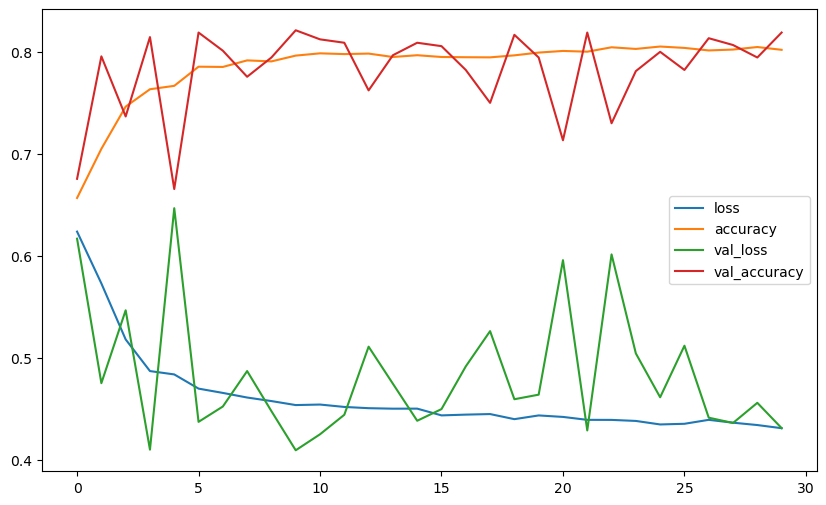

In [201]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [202]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[707  89]
 [ 76 128]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       796
           1       0.59      0.63      0.61       204

    accuracy                           0.83      1000
   macro avg       0.75      0.76      0.75      1000
weighted avg       0.84      0.83      0.84      1000



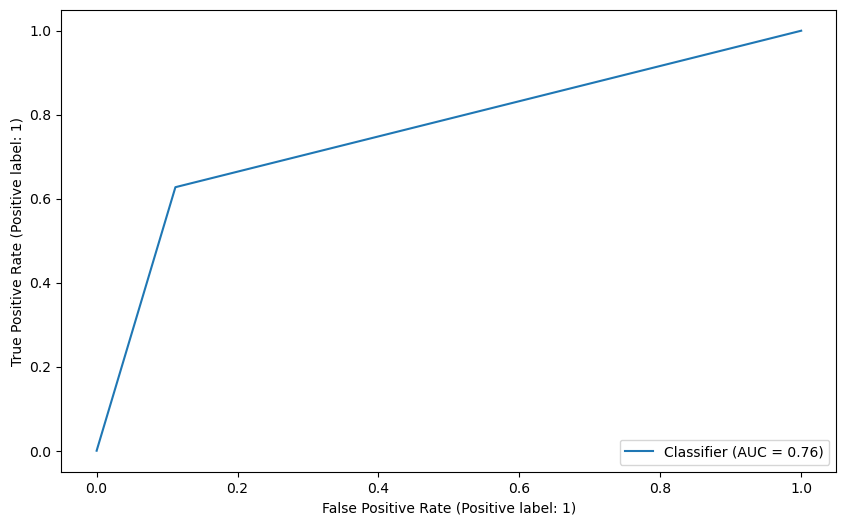

In [203]:
RocCurveDisplay.from_predictions(y_test, y_pred)

# Final Model and Model Deployment

In [204]:
pickle.dump(scaler, open("scaler_final", "wb"))

In [205]:
pickle.dump(encoder, open("encoder_final", "wb"))

In [206]:
model.save("model.h5")

## Prediction

In [220]:
single_customer = df.drop("Exited", axis=1).iloc[0:10, :]

In [221]:
single_customer

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,608,41,1,83807.86,1,112542.58,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,502,42,8,159660.80,3,113931.57,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,699,39,1,0.00,2,93826.63,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,79084.10,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
5,645,44,8,113755.78,2,149756.71,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
6,822,50,7,0.00,2,10062.80,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7,376,29,4,115046.74,4,119346.88,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
8,501,44,4,142051.07,2,74940.50,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9,684,27,2,134603.88,1,71725.73,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [222]:
(model.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 18ms/step


array([[0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1]])

In [223]:
df["Exited"].iloc[0:10]

0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Exited, dtype: int64

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___